In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LinearRegression # probably won't use this much
from sklearn.tree import DecisionTreeClassifier # EXTREMELY IMPORTANT
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from statsmodels.graphics.mosaicplot import mosaic


In [28]:
df = pd.read_csv('IDS_Dataset_Group_75.csv')

In [29]:
df.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
1,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
2,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
3,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,False
4,x9859f,male,28,Dutch,Cricket,63,False,True,True,False,1,False,phd,A,False


In [30]:
###################### All four experiences ######################

df['all-at-once'] = np.where((df['ind-programming_exp'] == True) & (df['ind-entrepeneur_exp'] == True) & (df['ind-international_exp'] == True) & (df['ind-debateclub'] == True), True, False)

###################### Exactly three experiences ######################

df['prog-entrepeneur-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == False), True, False)
df['prog-entrepeneur-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == True), True, False)
df['prog-international-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)
df['entrepeneur-international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)

###################### Exactly two experiences ######################

df['programming-entrepeneur'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == False ), True, False)
df['programming-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['programming-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-international'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)
df['international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)

###################### No experience or only one experience ######################

df['no_experience'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_programming'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_entrepeneur'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False) , True, False)
df['only_international'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_debate'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)

In [31]:
df.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,...,programming-international,programming-debate,entrepeneur-international,entrepeneur-debate,international-debate,no_experience,only_programming,only_entrepeneur,only_international,only_debate
0,x6077a,male,26,German,Golf,67,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
1,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2,x6241a,female,26,German,Golf,59,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,x9859f,male,28,Dutch,Cricket,63,False,True,True,False,...,True,False,False,False,False,False,False,False,False,False


In [32]:
print(f"All at once: \n{df['all-at-once'].value_counts()}")
print(f"Programming, Entrepreneur, and International: \n{df['prog-entrepeneur-international'].value_counts()}")
print(f"Programming, Entrepreneur, and Debate: \n{df['prog-entrepeneur-debate'].value_counts()}")
print(f"Programming, International, and Debate: \n{df['prog-international-debate'].value_counts()}")
print(f"Entrepreneur, International, and Debate: \n{df['entrepeneur-international-debate'].value_counts()}")
print(f"Programming and Entrepreneur: \n{df['programming-entrepeneur'].value_counts()}")
print(f"Programming and International: \n{df['programming-international'].value_counts()}")
print(f"Entrepreneur and International: \n{df['entrepeneur-international'].value_counts()}")
print(f"Entrepreneur and Debate: \n{df['entrepeneur-debate'].value_counts()}")
print(f"Programming and Debate: \n{df['programming-debate'].value_counts()}")
print(f"International and Debate: \n{df['international-debate'].value_counts()}")
print(f"Only Programming: \n{df['only_programming'].value_counts()}")
print(f"Only Entrepreneur: \n{df['only_entrepeneur'].value_counts()}")
print(f"Only International: \n{df['only_international'].value_counts()}")
print(f"Only Debate: \n{df['only_debate'].value_counts()}")
print(f"No Experience: \n{df['no_experience'].value_counts()}")

All at once: 
False    284
Name: all-at-once, dtype: int64
Programming, Entrepreneur, and International: 
False    284
Name: prog-entrepeneur-international, dtype: int64
Programming, Entrepreneur, and Debate: 
False    276
True       8
Name: prog-entrepeneur-debate, dtype: int64
Programming, International, and Debate: 
False    283
True       1
Name: prog-international-debate, dtype: int64
Entrepreneur, International, and Debate: 
False    278
True       6
Name: entrepeneur-international-debate, dtype: int64
Programming and Entrepreneur: 
False    276
True       8
Name: programming-entrepeneur, dtype: int64
Programming and International: 
False    277
True       7
Name: programming-international, dtype: int64
Entrepreneur and International: 
False    282
True       2
Name: entrepeneur-international, dtype: int64
Entrepreneur and Debate: 
False    261
True      23
Name: entrepeneur-debate, dtype: int64
Programming and Debate: 
False    220
True      64
Name: programming-debate, dtype: i

In [33]:
df.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,...,programming-international,programming-debate,entrepeneur-international,entrepeneur-debate,international-debate,no_experience,only_programming,only_entrepeneur,only_international,only_debate
0,x6077a,male,26,German,Golf,67,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
1,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2,x6241a,female,26,German,Golf,59,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,x9859f,male,28,Dutch,Cricket,63,False,True,True,False,...,True,False,False,False,False,False,False,False,False,False


In [34]:
# return the number of students who have no-expreience AND decision is True

df_exp = pd.DataFrame(columns=['experiences', 'acceptance_rate', 'num_of_students', 'num_of_accepted_students'])

def experience_acceptance_rates(df_exp):

    listOfColumns = ['all-at-once', 'prog-entrepeneur-international', 'prog-entrepeneur-debate', 'prog-international-debate', 'entrepeneur-international-debate', 'programming-entrepeneur', 'programming-international', 'entrepeneur-international', 'entrepeneur-debate', 'programming-debate', 'international-debate', 'only_programming', 'only_entrepeneur', 'only_international', 'only_debate', 'no_experience']

    # new dataframe
    

    for i in listOfColumns:
        if len(np.where(df[i] == True)[0]) == 0:
            print(f"[{i}]: {((df[(df[i] == True) & (df['decision'] == True)].shape[0])*100):.2f}% for {df[(df[i] == True)].shape[0]} students\n")
            #append to dataframe
            df_exp = df_exp.append({'experiences': i, 'acceptance_rate': ((df[(df[i] == True) & (df['decision'] == True)].shape[0])*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 0}, ignore_index=True)
        else:
            print(f"[{i}]: {(((df[(df[i] == True) & (df['decision'] == True)].shape[0])/(df[(df[i] == True)].shape[0]))*100):.2f}% for {df[(df[i] == True)].shape[0]} students\n")
            #append to dataframe
            df_exp = df_exp.append({'experiences': i, 'acceptance_rate': (((df[(df[i] == True) & (df['decision'] == True)].shape[0])/(df[(df[i] == True)].shape[0]))*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 5}, ignore_index=True)

    return df_exp

df_exp = experience_acceptance_rates(df_exp)

[all-at-once]: 0.00% for 0 students

[prog-entrepeneur-international]: 0.00% for 0 students

[prog-entrepeneur-debate]: 12.50% for 8 students

[prog-international-debate]: 100.00% for 1 students

[entrepeneur-international-debate]: 100.00% for 6 students

[programming-entrepeneur]: 12.50% for 8 students

[programming-international]: 28.57% for 7 students

[entrepeneur-international]: 100.00% for 2 students

[entrepeneur-debate]: 52.17% for 23 students

[programming-debate]: 28.12% for 64 students

[international-debate]: 52.17% for 23 students



/var/folders/m_/f8zs_l8j4yv4pfrlz5kqsmkw0000gn/T/ipykernel_57784/641988564.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_exp = df_exp.append({'experiences': i, 'acceptance_rate': ((df[(df[i] == True) & (df['decision'] == True)].shape[0])*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 0}, ignore_index=True)
/var/folders/m_/f8zs_l8j4yv4pfrlz5kqsmkw0000gn/T/ipykernel_57784/641988564.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_exp = df_exp.append({'experiences': i, 'acceptance_rate': ((df[(df[i] == True) & (df['decision'] == True)].shape[0])*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 0}, ignore_index=True)
/var/folders/m_/f8zs_l8j4yv4pfrlz5kqsmkw0000gn/T/ipykernel_57784/641988564.py:20: FutureWarning: The frame.append 

[only_programming]: 28.12% for 64 students

[only_entrepeneur]: 44.44% for 9 students

[only_international]: 26.92% for 52 students

[only_debate]: 26.92% for 52 students

[no_experience]: 40.24% for 82 students



/var/folders/m_/f8zs_l8j4yv4pfrlz5kqsmkw0000gn/T/ipykernel_57784/641988564.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_exp = df_exp.append({'experiences': i, 'acceptance_rate': (((df[(df[i] == True) & (df['decision'] == True)].shape[0])/(df[(df[i] == True)].shape[0]))*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 5}, ignore_index=True)
/var/folders/m_/f8zs_l8j4yv4pfrlz5kqsmkw0000gn/T/ipykernel_57784/641988564.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_exp = df_exp.append({'experiences': i, 'acceptance_rate': (((df[(df[i] == True) & (df['decision'] == True)].shape[0])/(df[(df[i] == True)].shape[0]))*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 5}, ignore_index=True)
/var/folders/m_/f8zs_l8j4yv4pfrlz5kqsmkw0000gn/T

In [35]:
# sort by acceptance rate
df_exp = df_exp.sort_values(by=['num_of_students'], ascending=False)
df_exp.head()

,experiences,acceptance_rate,num_of_students,num_of_accepted_students
15,no_experience,40.243902,82,5
9,programming-debate,28.125,64,5
11,only_programming,28.125,64,5
13,only_international,26.923077,52,5
14,only_debate,26.923077,52,5


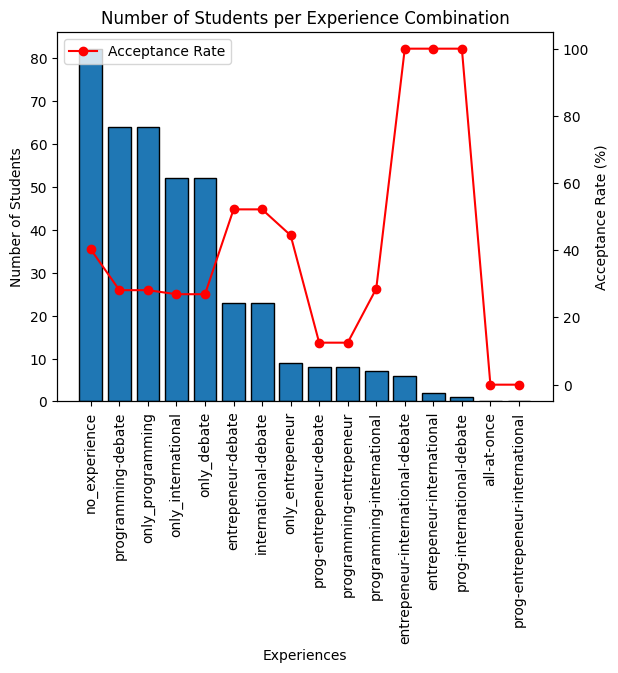

In [36]:
plt.title("Number of Students per Experience Combination")
plt.xlabel("Experiences")
plt.ylabel("Number of Students")
plt.bar(df_exp['experiences'], df_exp['num_of_students'], edgecolor='black')
plt.xticks(rotation=90)

ax2 = plt.twinx()
ax2.plot(df_exp['acceptance_rate'].values, color='r', marker='o', label='Acceptance Rate')
ax2.set_ylabel('Acceptance Rate (%)')
ax2.legend(loc='upper left')

plt.show()

In [37]:
df.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,...,programming-international,programming-debate,entrepeneur-international,entrepeneur-debate,international-debate,no_experience,only_programming,only_entrepeneur,only_international,only_debate
0,x6077a,male,26,German,Golf,67,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
1,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2,x6241a,female,26,German,Golf,59,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,x9859f,male,28,Dutch,Cricket,63,False,True,True,False,...,True,False,False,False,False,False,False,False,False,False


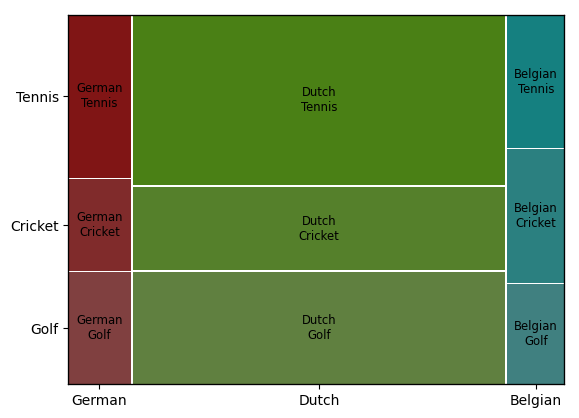

In [38]:
mosaic(df, ['nationality', 'sport'])
plt.xticks(rotation=90)
plt.show()

In [39]:
df[(df['decision']) == True].shape[0]/df.shape[0]

0.3873239436619718

In [40]:
employees = df.copy()
employees = employees[employees['decision'] == True]
employees.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,...,programming-international,programming-debate,entrepeneur-international,entrepeneur-debate,international-debate,no_experience,only_programming,only_entrepeneur,only_international,only_debate
1,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2,x6241a,female,26,German,Golf,59,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,x9170e,male,24,Belgian,Tennis,72,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
8,x7785e,female,31,Belgian,Golf,61,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11,x4001c,female,22,Belgian,Cricket,71,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False


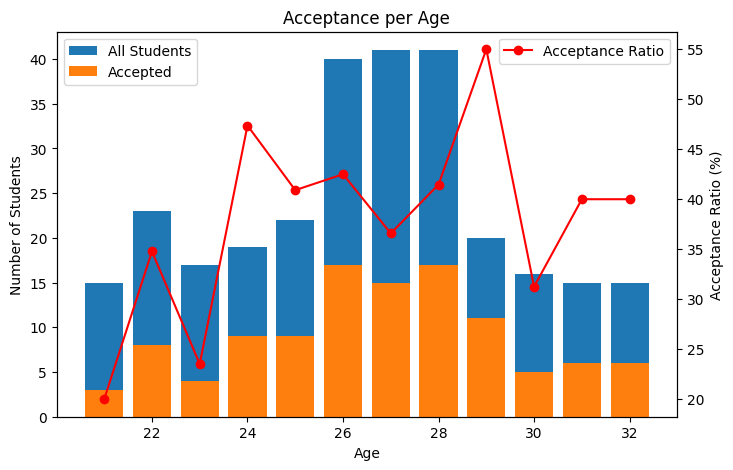

In [41]:
df_age_counts = df['age'].value_counts()
employees_age_counts = employees['age'].value_counts()
acceptance_ratio = employees_age_counts / df_age_counts * 100


plt.figure(figsize=(8, 5))
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)
plt.bar(employees['age'].value_counts().index, employees['age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Acceptance per Age')
plt.legend(['All Students', 'Accepted'], loc='upper left')

ax2 = plt.twinx()
ax2.plot(acceptance_ratio.index, acceptance_ratio.values, color='r', marker='o', label='Acceptance Ratio')
ax2.set_ylabel('Acceptance Ratio (%)')
ax2.legend(loc='upper right')

plt.show()

**Important note about graph above**

There is something important to mention here. The popualtion is learly split into three groups here. Firstly, the ages 26 - 28 are clearly the ones applying the most for this job. Most acceptances also happen in these three ages. That being said, ages 24 and 29 are the most likely to be accepted by far. This is interesting becasue the number of applicants younger than 26 is usually around the same for each age. On the other end of that spectrum, ages 21 and 23 are by far the least likely to be accepted.

I believe that this group of applicants at age 29 should be studied further.

In [42]:
twnety_nines = df.copy()
twnety_nines = twnety_nines[twnety_nines['age'] == 29]


t_6to8 = df.copy()
t_6to8 = t_6to8[t_6to8['age'] >= 26]
t_6to8 = t_6to8[t_6to8['age'] <= 28]
print(twnety_nines.describe())
print(t_6to8.describe())

        age  ind-university_grade  ind-languages
count  20.0             20.000000      20.000000
mean   29.0             61.250000       0.900000
std     0.0              4.203695       0.788069
min    29.0             55.000000       0.000000
25%    29.0             57.750000       0.000000
50%    29.0             61.000000       1.000000
75%    29.0             64.250000       1.000000
max    29.0             69.000000       3.000000
              age  ind-university_grade  ind-languages
count  122.000000            122.000000     122.000000
mean    27.008197             62.418033       1.360656
std      0.818140              5.565300       0.739282
min     26.000000             49.000000       0.000000
25%     26.000000             58.000000       1.000000
50%     27.000000             62.000000       1.000000
75%     28.000000             66.000000       2.000000
max     28.000000             76.000000       3.000000


In [43]:
twnety_nines['ind-degree'].value_counts()


master      10
bachelor     6
phd          4
Name: ind-degree, dtype: int64

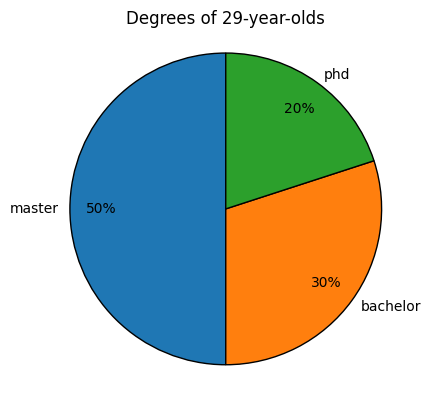

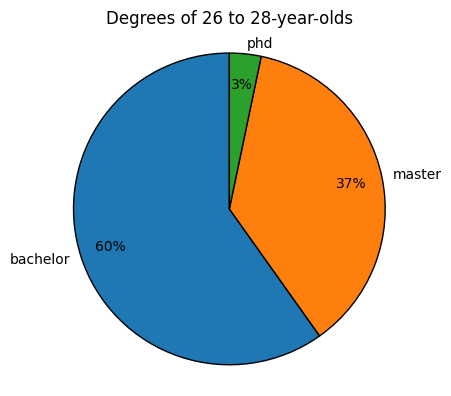

In [44]:
plt.figure(figsize=(4.6,4.6))
plt.pie(twnety_nines['ind-degree'].value_counts().values, labels=twnety_nines['ind-degree'].value_counts().index,
        autopct='%1.0f%%', 
        startangle=90, 
        pctdistance=0.8, 
        labeldistance=1.07, 
        radius=1.1, 
        rotatelabels=False, 
        counterclock=True, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Degrees of 29-year-olds')
plt.show()

plt.figure(figsize=(4.6,4.6))
plt.pie(t_6to8['ind-degree'].value_counts().values, labels=t_6to8['ind-degree'].value_counts().index,
        autopct='%1.0f%%', 
        startangle=90, 
        pctdistance=0.8, 
        labeldistance=1.07, 
        radius=1.1, 
        rotatelabels=False, 
        counterclock=True, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Degrees of 26 to 28-year-olds')
plt.show()

Accuracy: 0.6162790697674418


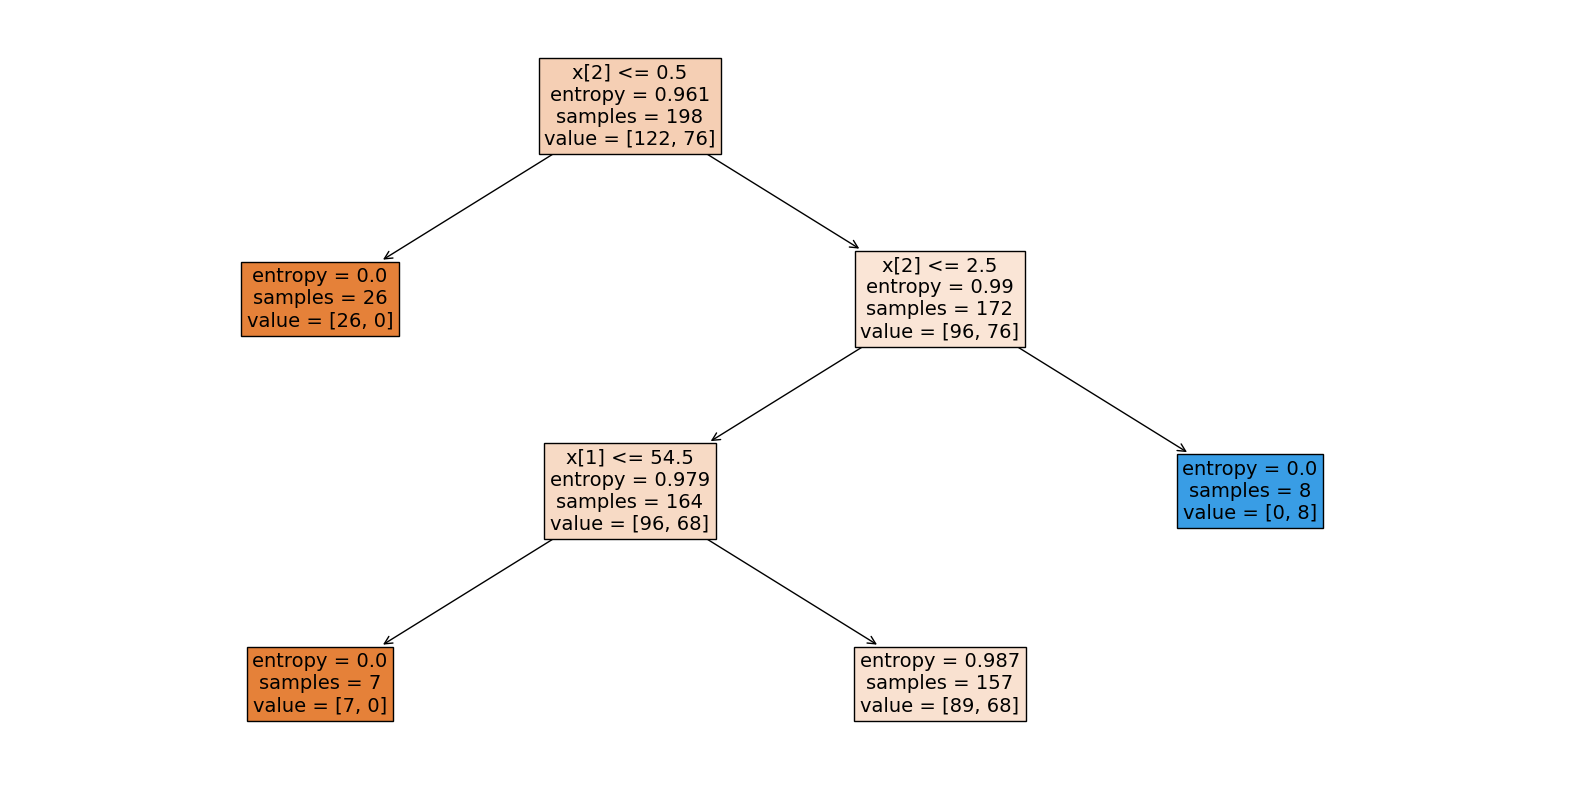

In [45]:

# split data into training and testing sets
X = df[['age', 'ind-university_grade', 'ind-languages']]
y = df['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# plot decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()


/var/folders/m_/f8zs_l8j4yv4pfrlz5kqsmkw0000gn/T/ipykernel_57784/1672797016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgenders["all"] = ""


Text(0.5, 0, '')

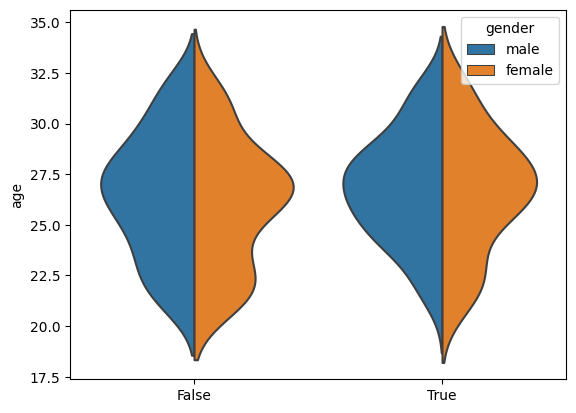

In [46]:
dfgenders = df[df['gender'] != 'other']
dfgenders["all"] = ""
ax = sns.violinplot(x = "decision", y="age", hue = 'gender', data = dfgenders, split=True, inner=None)
ax.set_xlabel("")

In [47]:
df.isnull().sum()


Id                                  0
gender                              0
age                                 0
nationality                         0
sport                               0
ind-university_grade                0
ind-debateclub                      0
ind-programming_exp                 0
ind-international_exp               0
ind-entrepeneur_exp                 0
ind-languages                       0
ind-exact_study                     0
ind-degree                          0
company                             0
decision                            0
all-at-once                         0
prog-entrepeneur-international      0
prog-entrepeneur-debate             0
prog-international-debate           0
entrepeneur-international-debate    0
programming-entrepeneur             0
programming-international           0
programming-debate                  0
entrepeneur-international           0
entrepeneur-debate                  0
international-debate                0
no_experienc

In [48]:
df.describe()

,age,ind-university_grade,ind-languages
count,284.000000,284.000000,284.000000
mean,26.471831,62.820423,1.306338
std,2.964319,5.593358,0.743282
min,21.000000,49.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,27.000000,63.000000,1.000000
75%,28.000000,67.000000,2.000000
max,32.000000,76.000000,3.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Id                                284 non-null    object
 1   gender                            284 non-null    object
 2   age                               284 non-null    int64 
 3   nationality                       284 non-null    object
 4   sport                             284 non-null    object
 5   ind-university_grade              284 non-null    int64 
 6   ind-debateclub                    284 non-null    bool  
 7   ind-programming_exp               284 non-null    bool  
 8   ind-international_exp             284 non-null    bool  
 9   ind-entrepeneur_exp               284 non-null    bool  
 10  ind-languages                     284 non-null    int64 
 11  ind-exact_study                   284 non-null    bool  
 12  ind-degree            

In [50]:
df['gender'].value_counts()

male      166
female    115
other       3
Name: gender, dtype: int64

In [51]:
df['nationality'].value_counts()

Dutch      215
German      36
Belgian     33
Name: nationality, dtype: int64

<AxesSubplot:>

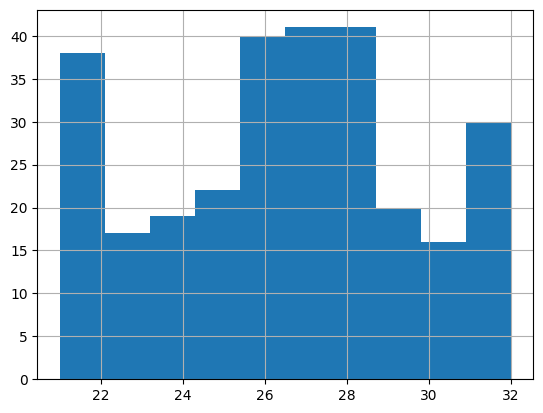

In [52]:
df['age'].hist(bins=10)

<AxesSubplot:>

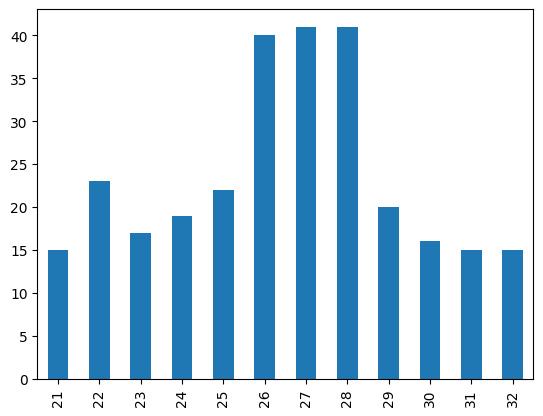

In [53]:
# makea bar chart of the ages sorted by age
df['age'].value_counts().sort_index().plot.bar()

Tennis     128
Golf        86
Cricket     70
Name: sport, dtype: int64


<AxesSubplot:>

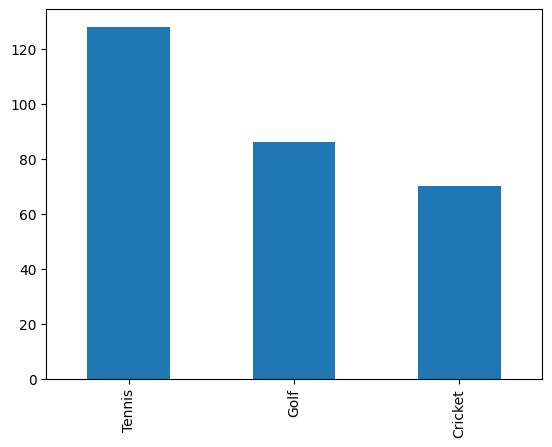

In [54]:
# bar chart of sports
print(df['sport'].value_counts())
df['sport'].value_counts().plot.bar()

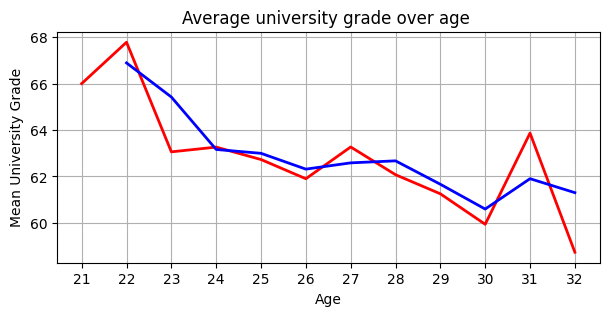

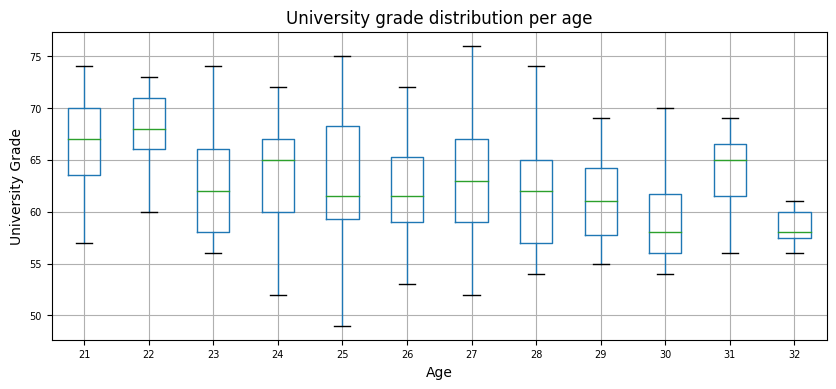

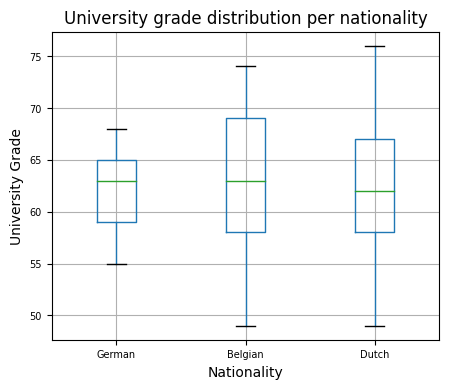

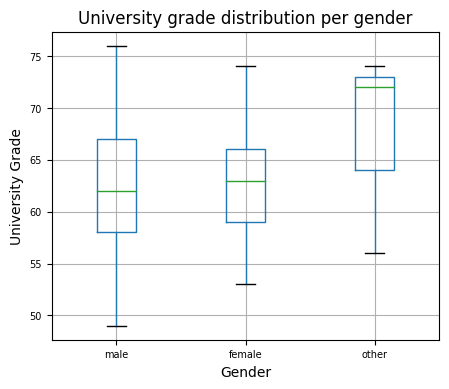

In [119]:
# average ind-university_grade of nationalities

ger = df['ind-university_grade'][df['nationality'] == 'German']
bel = df['ind-university_grade'][df['nationality'] == 'Belgian']
ned = df['ind-university_grade'][df['nationality'] == 'Dutch']
nat_df = pd.concat([ger, bel, ned], axis=1, keys=['German', 'Belgian', 'Dutch'])
nat_df = nat_df.reset_index(drop=True)

men = df['ind-university_grade'][df['gender'] == 'male']
women = df['ind-university_grade'][df['gender'] == 'female']
other = df['ind-university_grade'][df['gender'] == 'other']
gen_df = pd.concat([men, women, other], axis = 1, keys=['male', 'female', 'other'])
gen_df = gen_df.reset_index(drop=True)

twenty_ones = df['ind-university_grade'][df['age'] == 21]
twenty_twos = df['ind-university_grade'][df['age'] == 22]
twenty_threes = df['ind-university_grade'][df['age'] == 23]
twenty_fours = df['ind-university_grade'][df['age'] == 24]
twenty_fives = df['ind-university_grade'][df['age'] == 25]
twenty_sixes = df['ind-university_grade'][df['age'] == 26]
twenty_sevens = df['ind-university_grade'][df['age'] == 27]
twenty_eights = df['ind-university_grade'][df['age'] == 28]
twenty_nines = df['ind-university_grade'][df['age'] == 29]
thirty = df['ind-university_grade'][df['age'] == 30]
thirty_ones = df['ind-university_grade'][df['age'] == 31]
thirty_twos = df['ind-university_grade'][df['age'] == 32]
age_df = pd.concat([twenty_ones, twenty_twos, twenty_threes, twenty_fours, twenty_fives, twenty_sixes, twenty_sevens, twenty_eights, twenty_nines, thirty, thirty_ones, thirty_twos], axis=1, keys=['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'])
age_df = age_df.reset_index(drop=True)

# age_df.describe()


# plot ages line
plt.figure(figsize = (7, 3))
plt.title("Average university grade over age ")
plt.xlabel("Age")
plt.ylabel("Mean University Grade")
plt.plot(age_df.mean(), color='red',linewidth=2)
plt.plot(age_df.mean().rolling(window=2).mean(), color='blue',linewidth=2)
plt.grid(True)
plt.show()

# ages boxes
plt.figure(figsize = (10, 4))
plt.title("University grade distribution per age")
plt.xlabel('Age')
plt.ylabel('University Grade')
age_df.boxplot(fontsize=7, grid=True, showfliers=False) 
plt.show()

# nationalities boxes
plt.figure(figsize = (5, 4))
plt.title("University grade distribution per nationality")
plt.xlabel('Nationality')
plt.ylabel('University Grade')
nat_df.boxplot(fontsize=7, grid=True, showfliers=False) 
plt.show()

# genders boxes
plt.figure(figsize = (5, 4))
plt.title("University grade distribution per gender")
plt.xlabel('Gender')
plt.ylabel('University Grade')
gen_df.boxplot(fontsize=7, grid=True, showfliers=False) 
plt.show()
